In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [10]:
data = pd.read_csv('005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-19,59800.0,60400.0,59400.0,60200.0,57550.589844,12951496
1,2020-02-20,60700.0,61300.0,59600.0,60000.0,57359.390625,14591924
2,2020-02-21,58800.0,59800.0,58500.0,59200.0,56594.593750,13777393
3,2020-02-24,57400.0,58100.0,56800.0,56800.0,54300.218750,25627537
4,2020-02-25,56200.0,58000.0,56200.0,57900.0,55351.808594,23885408


In [11]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [12]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [17]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.3))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

ZeroDivisionError: float division by zero

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

In [18]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
18/18 [==============================] - 1s 50ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 2/20
18/18 [==============================] - 1s 44ms/step - loss: 9.7638e-04 - val_loss: 0.0037
Epoch 3/20
18/18 [==============================] - 1s 46ms/step - loss: 0.0010 - val_loss: 0.0076
Epoch 4/20
18/18 [==============================] - 1s 46ms/step - loss: 8.6462e-04 - val_loss: 0.0078
Epoch 5/20
18/18 [==============================] - 1s 47ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 6/20
18/18 [==============================] - 2s 89ms/step - loss: 9.3686e-04 - val_loss: 0.0041
Epoch 7/20
18/18 [==============================] - 2s 88ms/step - loss: 9.1063e-04 - val_loss: 0.0016
Epoch 8/20
18/18 [==============================] - 2s 89ms/step - loss: 9.3059e-04 - val_loss: 0.0016
Epoch 9/20
18/18 [==============================] - 1s 54ms/step - loss: 7.8792e-04 - val_loss: 0.0019
Epoch 10/20
18/18 [==============================] - 1s 58ms/step - loss: 9.1504e-04 

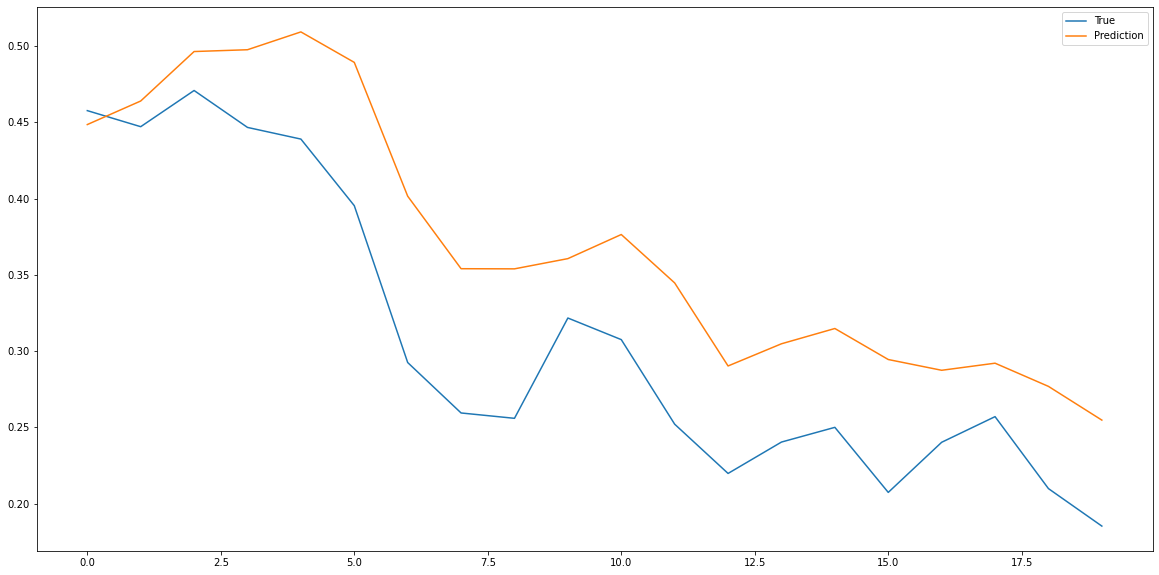

In [19]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()